In [130]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [99]:
data=pd.read_csv("titanic.csv")

In [100]:
data=pd.DataFrame(data=data)
data

,PassengerId,Passengers,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Perished,3,"Braund, Mr. Owen Harris",male,19 - 40,1,0,A/5 21171,7.2500,NaN,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,19 - 40,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,19 - 40,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,19 - 40,1,0,113803,53.1000,C123,S
4,5,Perished,3,"Allen, Mr. William Henry",male,19 - 40,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1301,Survived,3,"Peacock, Miss. Treasteall",female,Under 18,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1042,1303,Survived,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,19 - 40,1,0,19928,90.0000,C78,Q
1043,1304,Survived,3,"Henriksson, Miss. Jenny Lovisa",female,19 - 40,0,0,347086,7.7750,NaN,S
1044,1306,Survived,1,"Oliva y Ocana, Dona. Fermina",female,19 - 40,0,0,PC 17758,108.9000,C105,C


In [101]:
data.isnull().sum()

PassengerId      0
Passengers       0
Class            0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          774
Embarked         2
dtype: int64

In [102]:
data.columns

Index(['PassengerId', 'Passengers', 'Class', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
data['Cabin'].fillna(data.Cabin.mode()[0], inplace=True)

In [104]:
data['Embarked'].fillna(data.Embarked.mode()[0], inplace=True)

In [105]:
data['Fare'].fillna(data.Fare.mean(), inplace=True)

In [106]:
data.isnull().sum()

PassengerId    0
Passengers     0
Class          0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [107]:
data.drop(['PassengerId','Name','Ticket'],axis='columns',inplace=True)

In [108]:
data

,Passengers,Class,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Perished,3,male,19 - 40,1,0,7.2500,C23 C25 C27,S
1,Survived,1,female,19 - 40,1,0,71.2833,C85,C
2,Survived,3,female,19 - 40,0,0,7.9250,C23 C25 C27,S
3,Survived,1,female,19 - 40,1,0,53.1000,C123,S
4,Perished,3,male,19 - 40,0,0,8.0500,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...
1041,Survived,3,female,Under 18,1,1,13.7750,C23 C25 C27,S
1042,Survived,1,female,19 - 40,1,0,90.0000,C78,Q
1043,Survived,3,female,19 - 40,0,0,7.7750,C23 C25 C27,S
1044,Survived,1,female,19 - 40,0,0,108.9000,C105,C


In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Passengers','Sex','Age','Cabin','Embarked']
for val in list:
    data[val]=le.fit_transform(data[val].astype(str))

In [110]:
data


,Passengers,Class,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,0,1,0,7.2500,75,2
1,1,1,0,0,1,0,71.2833,100,0
2,1,3,0,0,0,0,7.9250,75,2
3,1,1,0,0,1,0,53.1000,66,2
4,0,3,1,0,0,0,8.0500,75,2
...,...,...,...,...,...,...,...,...,...
1041,1,3,0,2,1,1,13.7750,75,2
1042,1,1,0,0,1,0,90.0000,96,1
1043,1,3,0,0,0,0,7.7750,75,2
1044,1,1,0,0,0,0,108.9000,60,0


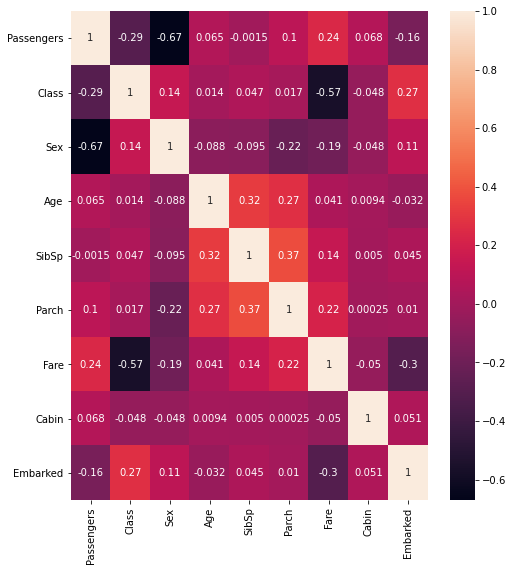

In [111]:
# correlation heatmap
import seaborn as sns
corr_hmap=data.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()


In [112]:
#removing outliers
from scipy.stats import zscore

In [113]:
z=np.abs(zscore(data))
threshold=3
print(np.where(z>3))

(array([   9,   12,   15,   22,   23,   36,   44,   49,   51,   54,   58,
         66,   67,   93,   94,  119,  132,  134,  137,  145,  146,  154,
        163,  188,  202,  208,  210,  211,  214,  223,  241,  248,  272,
        273,  274,  278,  288,  301,  304,  309,  316,  350,  351,  351,
        370,  383,  411,  429,  430,  443,  449,  462,  463,  482,  487,
        505,  523,  536,  537,  540,  543,  546,  554,  555,  568,  569,
        576,  581,  586,  587,  589,  616,  617,  620,  627,  646,  650,
        660,  678,  686,  709,  736,  736,  759,  760,  762,  763,  768,
        772,  772,  777,  778,  783,  802,  806,  808,  825,  826,  828,
        828,  837,  839,  852,  856,  856,  861,  875,  885,  888,  891,
        965,  966,  968,  970,  984,  995,  998, 1011, 1015, 1040],
      dtype=int64), array([7, 5, 4, 5, 6, 4, 4, 7, 4, 4, 7, 5, 6, 6, 4, 7, 4, 5, 4, 4, 7, 7,
       7, 4, 7, 6, 4, 7, 4, 4, 6, 6, 7, 7, 6, 7, 5, 6, 6, 4, 7, 5, 5, 6,
       7, 4, 7, 4, 4, 7, 5, 7, 7, 5

In [114]:
data_new=data[(z<3).all(axis=1)] 

In [115]:
print(data.shape)
print(data_new.shape)

(1046, 9)
(931, 9)


In [116]:
data=data_new
data.shape

(931, 9)

In [117]:
data.skew()

Passengers    0.466137
Class        -0.440920
Sex          -0.619352
Age           0.987512
SibSp         1.777378
Parch         1.946038
Fare          2.168981
Cabin         0.588185
Embarked     -1.327568
dtype: float64

In [118]:
# treating skewness using log

for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [119]:
data.skew()

Passengers    0.466137
Class        -0.440920
Sex          -0.619352
Age           0.987512
SibSp         1.127702
Parch         1.661700
Fare          0.412725
Cabin         0.588185
Embarked     -1.327568
dtype: float64

In [123]:
data1=data.drop(columns=['Passengers'])
x=data1
y=data['Passengers']

In [132]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print("Accuracy Score: ",score,"at random state: ",r_state)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)

Accuracy Score:  0.8536585365853658 at random state:  37
Accuracy Score:  0.848780487804878 at random state:  38
Accuracy Score:  0.8 at random state:  39
Accuracy Score:  0.8341463414634146 at random state:  40
Accuracy Score:  0.8975609756097561 at random state:  41
Accuracy Score:  0.8439024390243902 at random state:  42
Accuracy Score:  0.8390243902439024 at random state:  43
Accuracy Score:  0.8585365853658536 at random state:  44
Accuracy Score:  0.8585365853658536 at random state:  45
Accuracy Score:  0.8634146341463415 at random state:  46
Accuracy Score:  0.8536585365853658 at random state:  47
Accuracy Score:  0.8439024390243902 at random state:  48
Accuracy Score:  0.8682926829268293 at random state:  49
Accuracy Score:  0.8097560975609757 at random state:  50
Accuracy Score:  0.848780487804878 at random state:  51
Accuracy Score:  0.8536585365853658 at random state:  52
Accuracy Score:  0.848780487804878 at random state:  53
Accuracy Score:  0.8682926829268293 at random sta

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=41)
    

In [138]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred))
print('\n')
print('Confusion Matrix',confusion_matrix(y_test,pred))
print('\n')
print('classification report',classification_report(y_test,pred))


Accuracy Score:  0.8975609756097561


Confusion Matrix [[120   9]
 [ 12  64]]


classification report               precision    recall  f1-score   support

           0       0.91      0.93      0.92       129
           1       0.88      0.84      0.86        76

    accuracy                           0.90       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.90      0.90      0.90       205



In [143]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))


In [144]:
svmkernel('rbf')

0.6439024390243903
[[116  13]
 [ 60  16]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       129
           1       0.55      0.21      0.30        76

    accuracy                           0.64       205
   macro avg       0.61      0.55      0.53       205
weighted avg       0.62      0.64      0.59       205



In [145]:
svmkernel('poly')

0.6487804878048781
[[123   6]
 [ 66  10]]
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       129
           1       0.62      0.13      0.22        76

    accuracy                           0.65       205
   macro avg       0.64      0.54      0.50       205
weighted avg       0.64      0.65      0.57       205



In [146]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))


0.8439024390243902
[[109  20]
 [ 12  64]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       129
           1       0.76      0.84      0.80        76

    accuracy                           0.84       205
   macro avg       0.83      0.84      0.84       205
weighted avg       0.85      0.84      0.85       205



In [147]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8195121951219512
[[109  20]
 [ 17  59]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       129
           1       0.75      0.78      0.76        76

    accuracy                           0.82       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.82      0.82      0.82       205



In [149]:
#cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.80748663 0.7688172  0.78494624 0.90322581 0.96774194]
0.8464435627623483 0.07650220076895131


In [150]:
# saving the model

import joblib
joblib.dump(lg,'titanic.pkl') 

['titanic.pkl']